Dataset: House prices

1. Extract features like "house age" from year built

2. create "price per square foot" feature

3. Encode categorical features like neighbourhood, condition

4. Analyze feature importance using simple regression or tree model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task
Analyze house prices using the "bengaluru_house_prices.csv" dataset by engineering 'house_age' and 'price_per_sqft' features, encoding categorical features like 'location' (as 'neighbourhood'), and then assessing feature importance with a simple regression model.

In [ ]:
dataset = pd.read_csv('bengaluru_house_prices.csv')
print("First 5 rows of the dataset:")
print(dataset.head())

print("\nConcise summary of the dataset (column names, data types, non-null values):")
dataset.info()

print("\nDescriptive statistics of numerical columns:")
print(dataset.describe())

First 5 rows of the dataset:
              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  

Concise summary of the dataset (column names, data types, non-null values):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null C

## Feature Engineering: House Age

### Subtask:
Create a new feature 'house_age'. This will require a 'year_built' column. If a direct 'year_built' column is not found in the dataset, a suitable proxy will be sought or a placeholder will be used, and the user will be informed. The 'house_age' will be calculated by subtracting the 'year_built' from the current year.


**Reasoning**:
The subtask requires creating a 'house_age' feature from the 'availability' column. This involves extracting years from 'availability', handling different formats, and calculating the age based on the current year (2023, as per instructions). I will first define the current year for calculations, then process the 'availability' column to derive 'year_available', calculate 'house_age', and finally display the updated DataFrame with descriptive statistics for the new column.



In [ ]:
import re
import datetime

# Define the current year for calculation as specified in the instructions (e.g., 2023)
CURRENT_YEAR = 2023

# Function to extract year from availability or assign current year
def get_year_available(availability_str):
    if pd.isna(availability_str): # Handle NaN values
        return np.nan

    match_year = re.search(r'\d{2}-([JFMASOND]\w{2})', availability_str)
    if match_year:
        year_prefix = availability_str.split('-')[0] # Get the 'DD' part, e.g., '19'
        try:
            # Assuming years like '19' mean 2019, '20' mean 2020 etc.
            # We need to handle potential ambiguity for years like '01', '02', '99', etc.
            # For simplicity, if prefix is < 50, assume 20xx, else 19xx for old dates, but here context implies recent
            year_val = int(year_prefix)
            if year_val <= (CURRENT_YEAR % 100): # If it's a future year, like 24-Dec and CURRENT_YEAR is 2023, assume 2024
                return 2000 + year_val
            else:
                return 1900 + year_val # This might be less relevant for real estate availability but covers generic cases
        except ValueError:
            pass # If conversion fails, fall through to default

    # For 'Ready To Move' or other non-matching patterns, assign CURRENT_YEAR
    return CURRENT_YEAR

# Apply the function to create 'year_available'
dataset['year_available'] = dataset['availability'].apply(get_year_available)

# Convert 'year_available' to numeric, coercing errors to NaN
dataset['year_available'] = pd.to_numeric(dataset['year_available'], errors='coerce')

# Calculate 'house_age'
dataset['house_age'] = CURRENT_YEAR - dataset['year_available']


dataset['house_age'] = dataset['house_age'].apply(lambda x: max(0, x) if pd.notna(x) else x)

# Handle missing values in 'house_age' by filling with the median
median_house_age = dataset['house_age'].median()
dataset['house_age'].fillna(median_house_age, inplace=True)

print("First few rows of the DataFrame with 'year_available' and 'house_age':")
print(dataset[['availability', 'year_available', 'house_age']].head())

print("\nDescriptive statistics for 'house_age':")
print(dataset['house_age'].describe())


First few rows of the DataFrame with 'year_available' and 'house_age':
    availability  year_available  house_age
0         19-Dec            2019          4
1  Ready To Move            2023          0
2  Ready To Move            2023          0
3  Ready To Move            2023          0
4  Ready To Move            2023          0

Descriptive statistics for 'house_age':
count    13320.000000
mean         0.916441
std          1.873466
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: house_age, dtype: float64


/tmp/ipython-input-2236193273.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['house_age'].fillna(median_house_age, inplace=True)


In [ ]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,year_available,house_age
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2019,4
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,2023,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,2023,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,2023,0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2023,0


## Feature Engineering: Price per Square Foot

### Subtask:
Calculate a new feature 'price_per_sqft' by dividing the 'price' column by the 'total_sqft' column. Handle any potential division-by-zero or missing values if necessary.


In [ ]:
import re

# 1. Define a function to convert 'total_sqft' into a consistent numerical format
def convert_sqft_to_float(x):
    if isinstance(x, str):
        # Handle ranges (e.g., '1000-1200')
        if '-' in x:
            try:
                tokens = x.split('-')
                return (float(tokens[0]) + float(tokens[1])) / 2
            except ValueError:
                return np.nan # Return NaN if conversion fails
        # Handle other numerical strings
        try:
            return float(x)
        except ValueError:
            return np.nan # Return NaN if conversion fails
    return x # Return as is if already a number or NaN

# 2. Apply this function to the 'total_sqft' column and convert to numeric
dataset['total_sqft_cleaned'] = dataset['total_sqft'].apply(convert_sqft_to_float)
dataset['total_sqft_cleaned'] = pd.to_numeric(dataset['total_sqft_cleaned'], errors='coerce')

# 3. Handle any remaining missing values in the 'total_sqft_cleaned' column by filling them with the median
median_total_sqft = dataset['total_sqft_cleaned'].median()
dataset['total_sqft_cleaned'] = dataset['total_sqft_cleaned'].fillna(median_total_sqft)

dataset['price_per_sqft'] = dataset['price'] / dataset['total_sqft_cleaned'].replace(0, np.nan)

# If there are any NaNs created by division by zero, we can fill them with the median or 0, depending on context.
# For now, let's keep them as NaN to inspect.

# 5. Display the first few rows of the DataFrame
print("First few rows with 'price', 'total_sqft', and 'price_per_sqft':")
print(dataset[['price', 'total_sqft', 'total_sqft_cleaned', 'price_per_sqft']].head())

# 6. Print the descriptive statistics for the new 'price_per_sqft' column
print("\nDescriptive statistics for 'price_per_sqft':")
print(dataset['price_per_sqft'].describe())

First few rows with 'price', 'total_sqft', and 'price_per_sqft':
    price total_sqft  total_sqft_cleaned  price_per_sqft
0   39.07       1056              1056.0        0.036998
1  120.00       2600              2600.0        0.046154
2   62.00       1440              1440.0        0.043056
3   95.00       1521              1521.0        0.062459
4   51.00       1200              1200.0        0.042500

Descriptive statistics for 'price_per_sqft':
count    13320.000000
mean         0.079194
std          1.062471
min          0.002678
25%          0.042667
50%          0.054400
75%          0.073284
max        120.000000
Name: price_per_sqft, dtype: float64


In [ ]:
import numpy as np

# 1. Handle missing values in 'location' column
dataset['location'] = dataset['location'].fillna('Other')

# 2. Inspect 'location' column for a large number of unique values and group less frequent ones
location_stats = dataset['location'].value_counts(ascending=False)
location_stats_less_than_10 = location_stats[location_stats <= 10]

dataset['location'] = dataset['location'].apply(lambda x: 'Other' if x in location_stats_less_than_10 else x)

print(f"Number of unique locations after grouping: {dataset['location'].nunique()}")

# 3. Process 'size' column to create 'bhk' feature
def get_bhk(x):
    if isinstance(x, str):
        token = x.split(' ')
        try:
            return int(token[0])
        except ValueError:
            return np.nan # Handle cases like '4 Bedroom' where int(token[0]) might fail
    return np.nan # Return NaN for non-string or missing values

dataset['bhk'] = dataset['size'].apply(get_bhk)

# Fill missing 'bhk' values with the median
median_bhk = dataset['bhk'].median()
dataset['bhk'] = dataset['bhk'].fillna(median_bhk)

# Convert 'bhk' to int type
dataset['bhk'] = dataset['bhk'].astype(int)

# 4. Handle missing values in 'bath' and 'balcony' columns by filling with their respective medians
median_bath = dataset['bath'].median()
dataset['bath'] = dataset['bath'].fillna(median_bath)

median_balcony = dataset['balcony'].median()
dataset['balcony'] = dataset['balcony'].fillna(median_balcony)

# 5. Apply one-hot encoding to 'area_type' and 'location'
dataset = pd.get_dummies(dataset, columns=['area_type', 'location'], drop_first=True)

# 6. Drop columns that are no longer needed
columns_to_drop = [
    'availability',
    'society',
    'size', # Original 'size' column
    'total_sqft', # Original 'total_sqft' column
    'year_available',
    'total_sqft_cleaned' # Cleaned 'total_sqft' was used for price_per_sqft, but not needed as a separate column now
]

# Check if columns exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]
dataset = dataset.drop(columns=existing_columns_to_drop, axis=1)

# Display the first few rows of the updated DataFrame
print("\nFirst few rows of the updated DataFrame:")
print(dataset.head())

# Display its info() to show the new encoded features and the transformed 'bhk' column
print("\nInfo of the updated DataFrame:")
dataset.info()

Number of unique locations after grouping: 242

First few rows of the updated DataFrame:
   bath  balcony   price  house_age  price_per_sqft  bhk  \
0   2.0      1.0   39.07          4        0.036998    2   
1   5.0      3.0  120.00          0        0.046154    4   
2   2.0      3.0   62.00          0        0.043056    3   
3   3.0      1.0   95.00          0        0.062459    3   
4   2.0      1.0   51.00          0        0.042500    2   

   area_type_Carpet  Area  area_type_Plot  Area  \
0                   False                 False   
1                   False                  True   
2                   False                 False   
3                   False                 False   
4                   False                 False   

   area_type_Super built-up  Area  location_1st Block Jayanagar  ...  \
0                            True                         False  ...   
1                           False                         False  ...   
2                          

In [ ]:
dataset.head()

,bath,balcony,price,house_age,price_per_sqft,bhk,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_1st Block Jayanagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2.0,1.0,39.07,4,0.036998,2,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,3.0,120.00,0,0.046154,4,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,62.00,0,0.043056,3,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1.0,95.00,0,0.062459,3,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,51.00,0,0.042500,2,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.columns

Index(['bath', 'balcony', 'price', 'house_age', 'price_per_sqft', 'bhk',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'location_1st Block Jayanagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=250)

/tmp/ipython-input-354227141.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.head(n_top_features).values,


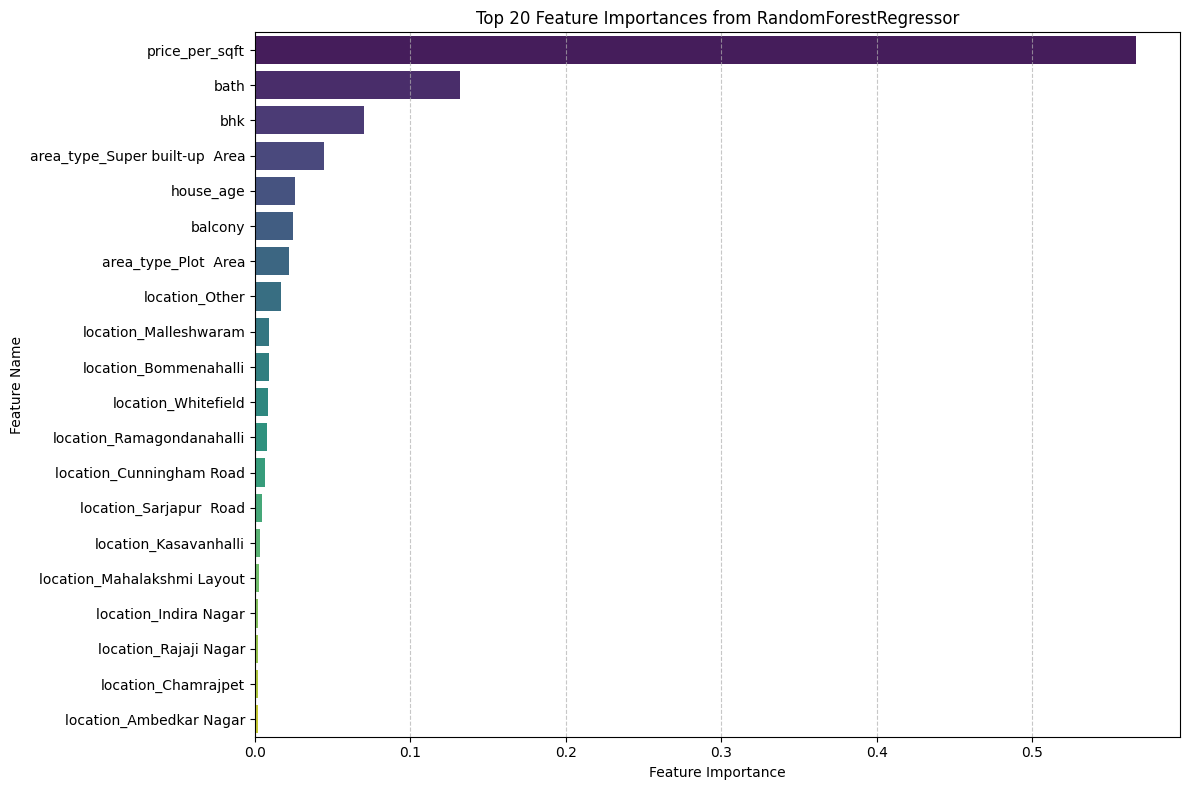

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = dataset.drop('price', axis=1)
y = dataset['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)


model.fit(X_train, y_train)


feature_importances = model.feature_importances_

feature_importance_series = pd.Series(feature_importances, index=X.columns)

sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

n_top_features = 20

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_feature_importances.head(n_top_features).values,
            y=sorted_feature_importances.head(n_top_features).index,
            palette='viridis')
plt.title(f'Top {n_top_features} Feature Importances from RandomForestRegressor')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()